In [1]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import math
from tabulate import tabulate
import scipy
import scipy.special
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt


data = pd.read_excel(r'C:\Users\Yair\Documents\Airtasker\Christian\data_clean.xlsx')
data = data.rename(columns={'Sibling Order':'Sibling_Order','Birth Method':'Birth_Method', 'Vaginal vs CS':'Vaginal_vs_CS',
                           'Gestation (D)':'Gestation_(D)'})
data.Extremity = data.Extremity.replace(['L','R'], 'T')
data['Weight_3'] = pd.cut(data['Weight'], [0,3,math.inf])
data.Sibling_Order = pd.cut(data['Sibling_Order'], [0,1,math.inf]) 
data['Weight_3_5'] = pd.cut(data['Weight'], [0,3.5,math.inf])
data.head()
data_orig = data
data_orig

,Age,Gender,Sibling_Order,Gestation_(D),Weight,Birth_Method,Vaginal_vs_CS,Extremity,Weight_3,Weight_3_5
0,5,F,"(1.0, inf]",273,3.500,Vaginal,Vaginal,T,"(3.0, inf]","(0.0, 3.5]"
1,13,M,"(1.0, inf]",280,4.020,Vaginal,Vaginal,T,"(3.0, inf]","(3.5, inf]"
2,15,F,"(0.0, 1.0]",294,3.860,Vaginal,Vaginal,T,"(3.0, inf]","(3.5, inf]"
3,19,F,"(0.0, 1.0]",294,3.290,Vaginal,Vaginal,T,"(3.0, inf]","(0.0, 3.5]"
4,35,M,"(1.0, inf]",279,4.670,Vaginal,Vaginal,T,"(3.0, inf]","(3.5, inf]"
...,...,...,...,...,...,...,...,...,...,...
173,230,M,"(0.0, 1.0]",287,3.160,Vaginal,Vaginal,NIL,"(3.0, inf]","(0.0, 3.5]"
174,242,M,"(0.0, 1.0]",292,4.150,Vaginal,Vaginal,NIL,"(3.0, inf]","(3.5, inf]"
175,256,M,"(1.0, inf]",251,3.055,Vaginal,Vaginal,NIL,"(3.0, inf]","(0.0, 3.5]"
176,293,M,"(0.0, 1.0]",282,3.350,EM-CS,CS,NIL,"(3.0, inf]","(0.0, 3.5]"


In [76]:
#Choose only categorial var
data = data.drop(columns={'Age','Gestation_(D)'})
data



,Gender,Sibling_Order,Weight,Birth_Method,Vaginal_vs_CS,Extremity
0,F,"(1.0, inf]","(0.0, 3.5]",Vaginal,Vaginal,T
1,M,"(1.0, inf]","(3.5, inf]",Vaginal,Vaginal,T
2,F,"(0.0, 1.0]","(3.5, inf]",Vaginal,Vaginal,T
3,F,"(0.0, 1.0]","(0.0, 3.5]",Vaginal,Vaginal,T
4,M,"(1.0, inf]","(3.5, inf]",Vaginal,Vaginal,T
...,...,...,...,...,...,...
173,M,"(0.0, 1.0]","(0.0, 3.5]",Vaginal,Vaginal,NIL
174,M,"(0.0, 1.0]","(3.5, inf]",Vaginal,Vaginal,NIL
175,M,"(1.0, inf]","(0.0, 3.5]",Vaginal,Vaginal,NIL
176,M,"(0.0, 1.0]","(0.0, 3.5]",EM-CS,CS,NIL


In [136]:
#General Analysis for categorial var
data = data_orig.drop(columns={'Age','Gestation_(D)', 'Weight'})

significance = 0.05

for var in data.columns:
    print(var)
    freq_table = pd.crosstab(data[var], data.Extremity, rownames = [var], colnames= ['Extremity'])
    print(tabulate(freq_table, headers='keys', tablefmt='psql'))
    #Chi test
    chi, pval_chi, dof_chi, exp_chi = chi2_contingency(freq_table)

    p = 1 - significance
    critical_value_chi = chi2.ppf(p, dof_chi)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value_chi))
    if chi > critical_value_chi:
        print("""At %.2f level of significance, by using chi-test we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.""" % (significance))
    ##Ficher test
    try:
        if freq_table.iloc[0][0]>freq_table.iloc[1][0]:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='greater')
            print('greater is chosen')
        else:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='less')
            print('Less is chosen')
        print('p=%.6f one side' % (pvalue_fisher))
        oddsratio, pvalue_fisher = stats.fisher_exact(freq_table)
        print('p=%.6f two sides' % (pvalue_fisher))
        if pvalue_fisher <= significance:
            print("""At %.2f level of significance, by using Fisher's test we reject the null hypotheses and accept H1. 
                They are not independent.""" % (significance))
        else:
            print("""At %.2f level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.""" % (significance))
    except:
        print("Cannot perform this calculation by the regular mode")
    
        
#         stats = importr('stats')
# m = np.array([[4,4],[4,5],[10,6]])
# res = stats.fisher_test(m)
# print 'p-value: {}'.format(res[0][0])
# >> p-value: 0.668165917041
    
    
    
    


Gender
+----------+-------+-----+
| Gender   |   NIL |   T |
|----------+-------+-----|
| F        |    15 |  54 |
| M        |    32 |  77 |
+----------+-------+-----+
chi=0.900463, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Less is chosen
p=0.171531 one side
p=0.297940 two sides
At 0.05 level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.
Sibling_Order
+-----------------+-------+-----+
| Sibling_Order   |   NIL |   T |
|-----------------+-------+-----|
| (0.0, 1.0]      |    26 |  58 |
| (1.0, inf]      |    21 |  73 |
+-----------------+-------+-----+
chi=1.278847, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
greater is chosen
p=0.129086 one side
p=0.233850 two sides
At 0.05 level of significance, by using by using Fishe

In [8]:
# def p(a): 
#     v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
#     return v

# data = data_orig
# for var in data.columns:
#     print(var)
#     freq_table = pd.crosstab(data[var], data.Extremity, rownames = [var], colnames= ['Extremity'])
#     print(tabulate(freq_table, headers='keys', tablefmt='psql'))
#     df2=freq_table.copy()
#     df2.loc['Column_Total']= df2.sum(numeric_only=True, axis=0)
#     df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
#     n=df2.at["Column_Total", "Row_Total"]  # grand total 
#     exp=df2.copy()               # create dataframe with expected frequencies
#     for x in exp.index[0:-1]:
#         for y in exp.columns[0:-1]:
#             # round expected values to nearest hundredths:
#             v= (((df2.at[x, "Row_Total"]) * (df2.at["Column_Total", y])   )   /n ).round(2) 
#             exp.at[x,y]=float(v)
#             p_observed=p(freq_table.iloc[0,0]) # In our contingency table, a was equal to 7.

#             p_list=[]
#             for i in range(int(df2.iloc[0,2])  + 1  ): # calculate p(a) for every possible table we can get given the fixed margins...
#             #... this ranges from "9 choose 0" to "9 choose 9" so we should get 10 possible tables and their respective probabilities..
#                 if p(i)<=p_observed:
#                     p_list.append(p(i))     # append these probabilites to p_list only if <= p_observed
#             pvalue_fisher=np.sum(p_list)
#             print('p=%.6f' % (pvalue_fisher))
#             if pvalue_fisher <= significance:
#                 print("""At %.2f level of significance, by using Fisher's test we reject the null hypotheses and accept H1. 
#                 They are not independent.""" % (significance))
#             else:
#                 print("""At %.2f level of significance, by using by using Fisher's test, we accept the null hypotheses. 
#                     They are independent.""" % (significance))

            
            

In [2]:
#Cohorts Analysis - M 
data = data_orig.drop(columns={'Age','Gestation_(D)', 'Weight'})
data = data[data.Gender=='M']

significance = 0.05

def p(a): 
    v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
    return v

for var in data.columns:
    print(var)
    freq_table = pd.crosstab(data[var], data.Extremity, rownames = [var], colnames= ['Extremity'])
    print(tabulate(freq_table, headers='keys', tablefmt='psql'))
    #Chi test
    chi, pval_chi, dof_chi, exp_chi = chi2_contingency(freq_table)

    p = 1 - significance
    critical_value_chi = chi2.ppf(p, dof_chi)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value_chi))
    if chi > critical_value_chi:
        print("""At %.2f level of significance, by using chi-test we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.""" % (significance))
    ##Ficher test
    try:
        if freq_table.iloc[0][0]>freq_table.iloc[1][0]:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='greater')
            print('greater is chosen')
        else:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='less')
            print('Less is chosen')
        print('p=%.6f one side' % (pvalue_fisher))
        oddsratio, pvalue_fisher = stats.fisher_exact(freq_table)
        print('p=%.6f two sides' % (pvalue_fisher))
        if pvalue_fisher <= significance:
            print("""At %.2f level of significance, by using Fisher's test we reject the null hypotheses and accept H1. 
                They are not independent.""" % (significance))
        else:
            print("""At %.2f level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.""" % (significance))
    except:
        print("Cannot perform this calculation by the regular mode")

        

                    
            
                
        


Gender
+----------+-------+-----+
| Gender   |   NIL |   T |
|----------+-------+-----|
| M        |    32 |  77 |
+----------+-------+-----+
chi=0.000000, critical value=nan

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Cannot perform this calculation by the regular mode
Sibling_Order
+-----------------+-------+-----+
| Sibling_Order   |   NIL |   T |
|-----------------+-------+-----|
| (0.0, 1.0]      |    15 |  32 |
| (1.0, inf]      |    17 |  45 |
+-----------------+-------+-----+
chi=0.088842, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Less is chosen
p=0.765523 one side
p=0.673473 two sides
At 0.05 level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.
Birth_Method
+----------------+-------+-----+
| Birth_Method   |   NIL |   T |
|-------------

In [134]:
#Cohorts Analysis - F
data = data_orig.drop(columns={'Age','Gestation_(D)','Weight'})
data = data[data.Gender=='F']

significance = 0.05

def p(a): 
    v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
    return v

for var in data.columns:
    print(var)
    freq_table = pd.crosstab(data[var], data.Extremity, rownames = [var], colnames= ['Extremity'])
    print(tabulate(freq_table, headers='keys', tablefmt='psql'))
    #Chi test
    chi, pval_chi, dof_chi, exp_chi = chi2_contingency(freq_table)

    p = 1 - significance
    critical_value_chi = chi2.ppf(p, dof_chi)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value_chi))
    if chi > critical_value_chi:
        print("""At %.2f level of significance, by using chi-test we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.""" % (significance))
    ##Ficher test
    try:
        if freq_table.iloc[0][0]>freq_table.iloc[1][0]:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='greater')
            print('greater is chosen')
        else:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='less')
            print('Less is chosen')
        print('p=%.6f one side' % (pvalue_fisher))
        oddsratio, pvalue_fisher = stats.fisher_exact(freq_table)
        print('p=%.6f two sides' % (pvalue_fisher))
        if pvalue_fisher <= significance:
            print("""At %.2f level of significance, by using Fisher's test we reject the null hypotheses and accept H1. 
                They are not independent.""" % (significance))
        else:
            print("""At %.2f level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.""" % (significance))
    except:
        print("Cannot perform this calculation by the regular mode")


Gender
+----------+-------+-----+
| Gender   |   NIL |   T |
|----------+-------+-----|
| F        |    15 |  54 |
+----------+-------+-----+
chi=0.000000, critical value=nan

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Cannot perform this calculation by the regular mode
Sibling_Order
+-----------------+-------+-----+
| Sibling_Order   |   NIL |   T |
|-----------------+-------+-----|
| (0.0, 1.0]      |    11 |  26 |
| (1.0, inf]      |     4 |  28 |
+-----------------+-------+-----+
chi=2.067054, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
greater is chosen
p=0.073924 one side
p=0.142097 two sides
At 0.05 level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.
Birth_Method
+----------------+-------+-----+
| Birth_Method   |   NIL |   T |
|----------

Age


C:\Users\Yair\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


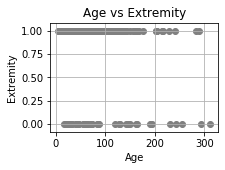

PointbiserialrResult(correlation=-0.06879730855159692, pvalue=0.3615131267509098)
Gestation_(D)


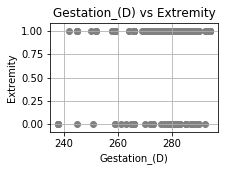

PointbiserialrResult(correlation=0.07954139667424942, pvalue=0.2912372718442696)
Weight


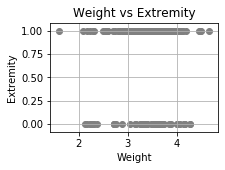

PointbiserialrResult(correlation=0.07416913227681482, pvalue=0.3251528670580238)
Extremity


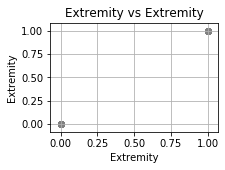

PointbiserialrResult(correlation=1.0, pvalue=0.0)


In [65]:
#Analise segment var
##total sample
data = data_orig[['Age','Gestation_(D)','Weight','Extremity' ]]
code_Extremity = {"Extremity":     {"T": 1, "NIL": 0}}
data.replace(code_Extremity, inplace=True)
for var in data.columns:
    print(var)
    Extremity = data['Extremity']
    y = data[var]
    pbc = stats.pointbiserialr(Extremity,y)
    plt.figure(1, figsize = (3,2))
    plt.scatter(y, Extremity,  color='gray')
    plt.title('%s vs Extremity' %(var))
    plt.ylabel('Extremity')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()
    print(pbc)

In [73]:
data

,Age,Gestation_(D),Weight,Extremity
1,13,280,4.020,1
4,35,279,4.670,1
5,38,292,3.400,1
6,39,272,4.110,1
7,41,279,4.060,1
...,...,...,...,...
173,230,287,3.160,0
174,242,292,4.150,0
175,256,251,3.055,0
176,293,282,3.350,0


Age


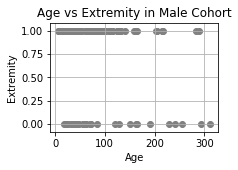

PointbiserialrResult(correlation=-0.11906214536188345, pvalue=0.21753623096166447)
Gestation_(D)


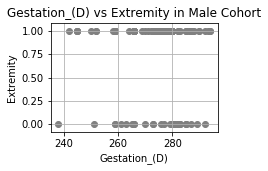

PointbiserialrResult(correlation=-0.03974616176673547, pvalue=0.6815563414527761)
Weight


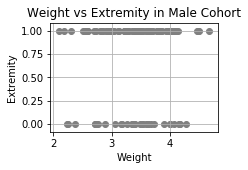

PointbiserialrResult(correlation=0.03552817768571168, pvalue=0.7137946502146008)
Extremity


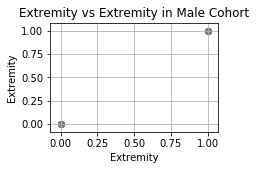

PointbiserialrResult(correlation=1.0, pvalue=0.0)


In [76]:
#Analise segment var
##Male cohort
data = data_orig
data = data[data.Gender=='M']
data = data[['Age','Gestation_(D)','Weight','Extremity' ]]
code_Extremity = {"Extremity":     {"T": 1, "NIL": 0}}
data.replace(code_Extremity, inplace=True)
for var in data.columns:
    print(var)
    Extremity = data['Extremity']
    y = data[var]
    pbc = stats.pointbiserialr(Extremity,y)
    plt.figure(1, figsize = (3,2))
    plt.scatter(y, Extremity,  color='gray')
    plt.title('%s vs Extremity in Male Cohort' %(var))
    plt.ylabel('Extremity')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()
    print(pbc)   

Age


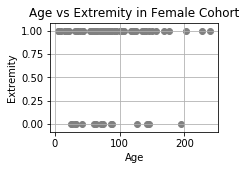

PointbiserialrResult(correlation=0.045759611140793535, pvalue=0.7088809560686797)
Gestation_(D)


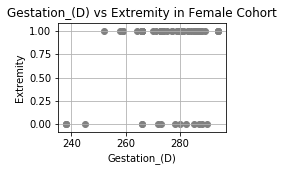

PointbiserialrResult(correlation=0.2756511783311556, pvalue=0.021876261774627773)
Weight


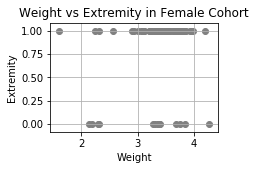

PointbiserialrResult(correlation=0.16318780547953665, pvalue=0.18031809222131584)
Extremity


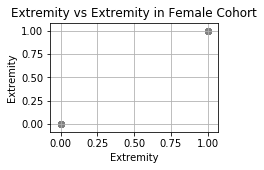

PointbiserialrResult(correlation=1.0, pvalue=0.0)


In [107]:
#Analise segment var
##Female cohort
data = data_orig
data = data[data.Gender=='F']
data = data[['Age','Gestation_(D)','Weight','Extremity' ]]
code_Extremity = {"Extremity":     {"T": 1, "NIL": 0}}
data.replace(code_Extremity, inplace=True)
for var in data.columns:
    print(var)
    Extremity = data['Extremity']
    y = data[var]
    pbc = stats.pointbiserialr(Extremity,y)
    plt.figure(1, figsize = (3,2))
    plt.scatter(y, Extremity,  color='gray')
    plt.title('%s vs Extremity in Female Cohort' %(var))
    plt.ylabel('Extremity')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()
    print(pbc) 

In [133]:
#cibling orded Cohort
##First born cohort
###categorial data
data = data_orig.drop(columns={'Age','Gestation_(D)','Weight'})
data = data.set_index('Sibling_Order').loc[1]

significance = 0.05

def p(a): 
    v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
    return v

for var in data.columns:
    print(var)
    freq_table = pd.crosstab(data[var], data.Extremity, rownames = [var], colnames= ['Extremity'])
    print(tabulate(freq_table, headers='keys', tablefmt='psql'))
    #Chi test
    chi, pval_chi, dof_chi, exp_chi = chi2_contingency(freq_table)

    p = 1 - significance
    critical_value_chi = chi2.ppf(p, dof_chi)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value_chi))
    if chi > critical_value_chi:
        print("""At %.2f level of significance, by using chi-test we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.""" % (significance))
    ##Ficher test
    try:
        if freq_table.iloc[0][0]>freq_table.iloc[1][0]:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='greater')
            print('greater is chosen')
        else:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='less')
            print('Less is chosen')
        print('p=%.6f one side' % (pvalue_fisher))
        oddsratio, pvalue_fisher = stats.fisher_exact(freq_table)
        print('p=%.6f two sides' % (pvalue_fisher))
        if pvalue_fisher <= significance:
            print("""At %.2f level of significance, by using Fisher's test we reject the null hypotheses and accept H1. 
                They are not independent.""" % (significance))
        else:
            print("""At %.2f level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.""" % (significance))
    except:
        print("Cannot perform this calculation by the regular mode")


Gender
+----------+-------+-----+
| Gender   |   NIL |   T |
|----------+-------+-----|
| F        |    11 |  26 |
| M        |    15 |  32 |
+----------+-------+-----+
chi=0.000513, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Less is chosen
p=0.510479 one side
p=1.000000 two sides
At 0.05 level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.
Birth_Method
+----------------+-------+-----+
| Birth_Method   |   NIL |   T |
|----------------+-------+-----|
| CS             |     4 |   3 |
| EL-CS          |     0 |   3 |
| EM-CS          |     3 |  13 |
| Vaginal        |    19 |  39 |
+----------------+-------+-----+
chi=4.794773, critical value=7.814728

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Cannot perform this calculation by the regular mode
Va

Age


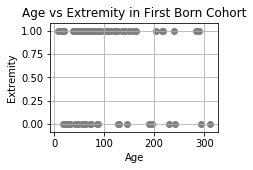

PointbiserialrResult(correlation=-0.04691759833956859, pvalue=0.6717136894389621)
Gestation_(D)


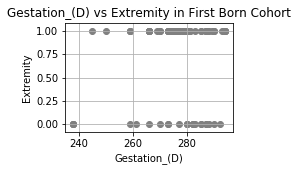

PointbiserialrResult(correlation=0.14712200544610526, pvalue=0.18172220887658297)
Weight


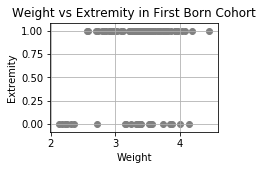

PointbiserialrResult(correlation=0.2290847051200897, pvalue=0.036073509627137165)
Extremity


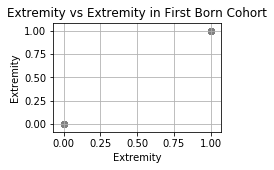

PointbiserialrResult(correlation=0.9999999999999997, pvalue=0.0)


In [109]:
#cibling orded Cohort
##First born cohort
###interval data
data = data_orig
data = data.set_index('Sibling_Order').loc[1]
data = data[['Age','Gestation_(D)','Weight','Extremity' ]]
code_Extremity = {"Extremity":     {"T": 1, "NIL": 0}}
data.replace(code_Extremity, inplace=True)
for var in data.columns:
    print(var)
    Extremity = data['Extremity']
    y = data[var]
    pbc = stats.pointbiserialr(Extremity,y)
    plt.figure(1, figsize = (3,2))
    plt.scatter(y, Extremity,  color='gray')
    plt.title('%s vs Extremity in First Born Cohort' %(var))
    plt.ylabel('Extremity')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()
    print(pbc) 

In [3]:
#cibling orded Cohort
##2+ Child cohort
###categorial data
data = data_orig.drop(columns={'Age','Gestation_(D)','Weight'})
data = data.set_index('Sibling_Order').loc[2]

significance = 0.05

def p(a): 
    v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
    return v

for var in data.columns:
    print(var)
    freq_table = pd.crosstab(data[var], data.Extremity, rownames = [var], colnames= ['Extremity'])
    print(tabulate(freq_table, headers='keys', tablefmt='psql'))
    #Chi test
    chi, pval_chi, dof_chi, exp_chi = chi2_contingency(freq_table)

    p = 1 - significance
    critical_value_chi = chi2.ppf(p, dof_chi)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value_chi))
    if chi > critical_value_chi:
        print("""At %.2f level of significance, by using chi-test we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.""" % (significance))
    ##Ficher test
    try:
        if freq_table.iloc[0][0]>freq_table.iloc[1][0]:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='greater')
            print('greater is chosen')
        else:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='less')
            print('Less is chosen')
        print('p=%.6f one side' % (pvalue_fisher))
        oddsratio, pvalue_fisher = stats.fisher_exact(freq_table)
        print('p=%.6f two sides' % (pvalue_fisher))
        if pvalue_fisher <= significance:
            print("""At %.2f level of significance, by using Fisher's test we reject the null hypotheses and accept H1. 
                They are not independent.""" % (significance))
        else:
            print("""At %.2f level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.""" % (significance))
    except:
        print("Cannot perform this calculation by the regular mode")

Gender
+----------+-------+-----+
| Gender   |   NIL |   T |
|----------+-------+-----|
| F        |     4 |  28 |
| M        |    17 |  45 |
+----------+-------+-----+
chi=1.916208, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Less is chosen
p=0.080244 one side
p=0.122038 two sides
At 0.05 level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.
Birth_Method
+----------------+-------+-----+
| Birth_Method   |   NIL |   T |
|----------------+-------+-----|
| CS             |     1 |   5 |
| EL-CS          |     1 |   6 |
| EM-CS          |     1 |   7 |
| Vaginal        |    18 |  55 |
+----------------+-------+-----+
chi=1.045510, critical value=7.814728

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Cannot perform this calculation by the regular mode
Va

Age


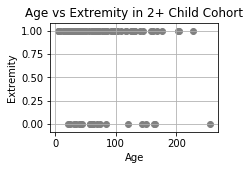

PointbiserialrResult(correlation=-0.062177377824768745, pvalue=0.5516144480636087)
Gestation_(D)


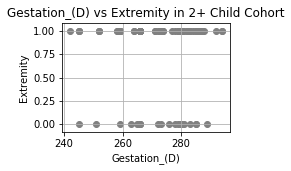

PointbiserialrResult(correlation=0.030793683452634085, pvalue=0.7682757369384651)
Weight


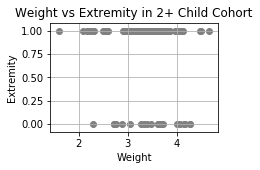

PointbiserialrResult(correlation=-0.06316866996290628, pvalue=0.545276638101812)
Extremity


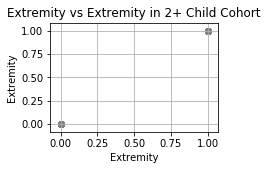

PointbiserialrResult(correlation=0.9999999999999998, pvalue=0.0)


In [110]:
#cibling orded Cohort
##2+ Child cohort
###interval data
data = data_orig
data = data.set_index('Sibling_Order').loc[2]
data = data[['Age','Gestation_(D)','Weight','Extremity' ]]
code_Extremity = {"Extremity":     {"T": 1, "NIL": 0}}
data.replace(code_Extremity, inplace=True)
for var in data.columns:
    print(var)
    Extremity = data['Extremity']
    y = data[var]
    pbc = stats.pointbiserialr(Extremity,y)
    plt.figure(1, figsize = (3,2))
    plt.scatter(y, Extremity,  color='gray')
    plt.title('%s vs Extremity in 2+ Child Cohort' %(var))
    plt.ylabel('Extremity')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()
    print(pbc) 

In [131]:
#Cohorts Analysis - Birth method
## CS
###Catheforial Var
data = data_orig.drop(columns={'Age','Gestation_(D)','Weight'})
data = data[data.Vaginal_vs_CS=='CS']

significance = 0.05

def p(a): 
    v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
    return v

for var in data.columns:
    print(var)
    freq_table = pd.crosstab(data[var], data.Extremity, rownames = [var], colnames= ['Extremity'])
    print(tabulate(freq_table, headers='keys', tablefmt='psql'))
    #Chi test
    chi, pval_chi, dof_chi, exp_chi = chi2_contingency(freq_table)

    p = 1 - significance
    critical_value_chi = chi2.ppf(p, dof_chi)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value_chi))
    if chi > critical_value_chi:
        print("""At %.2f level of significance, by using chi-test we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.""" % (significance))
    ##Ficher test
    try:
        if freq_table.iloc[0][0]>freq_table.iloc[1][0]:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='greater')
            print('greater is chosen')
        else:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='less')
            print('Less is chosen')
        print('p=%.6f one side' % (pvalue_fisher))
        oddsratio, pvalue_fisher = stats.fisher_exact(freq_table)
        print('p=%.6f two sides' % (pvalue_fisher))
        if pvalue_fisher <= significance:
            print("""At %.2f level of significance, by using Fisher's test we reject the null hypotheses and accept H1. 
                They are not independent.""" % (significance))
        else:
            print("""At %.2f level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.""" % (significance))
    except:
        print("Cannot perform this calculation by the regular mode")

Gender
+----------+-------+-----+
| Gender   |   NIL |   T |
|----------+-------+-----|
| F        |     2 |  19 |
| M        |     8 |  18 |
+----------+-------+-----+
chi=1.990614, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Less is chosen
p=0.077057 one side
p=0.149759 two sides
At 0.05 level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.
Sibling_Order
+-----------------+-------+-----+
| Sibling_Order   |   NIL |   T |
|-----------------+-------+-----|
| (0.0, 1.0]      |     7 |  19 |
| (1.0, inf]      |     3 |  18 |
+-----------------+-------+-----+
chi=0.481644, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
greater is chosen
p=0.246014 one side
p=0.475386 two sides
At 0.05 level of significance, by using by using Fishe

Age


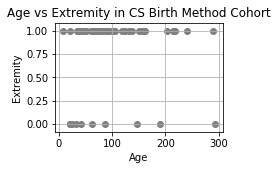

PointbiserialrResult(correlation=0.07370786751250519, pvalue=0.6224511663972914)
Gestation_(D)


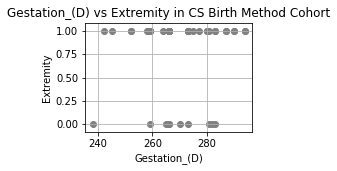

PointbiserialrResult(correlation=0.057831878950010907, pvalue=0.6994058042005127)
Weight


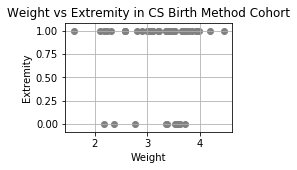

PointbiserialrResult(correlation=0.01939088348858653, pvalue=0.89706520662143)
Extremity


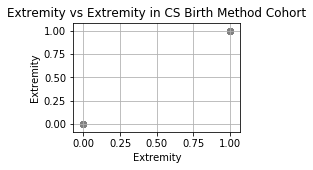

PointbiserialrResult(correlation=1.0, pvalue=0.0)


In [111]:
#Cohorts Analysis - Birth method
## CS
###segment Var
data = data_orig
data = data[data.Vaginal_vs_CS=='CS']
data = data[['Age','Gestation_(D)','Weight','Extremity' ]]
code_Extremity = {"Extremity":     {"T": 1, "NIL": 0}}
data.replace(code_Extremity, inplace=True)
for var in data.columns:
    print(var)
    Extremity = data['Extremity']
    y = data[var]
    pbc = stats.pointbiserialr(Extremity,y)
    plt.figure(1, figsize = (3,2))
    plt.scatter(y, Extremity,  color='gray')
    plt.title('%s vs Extremity in CS Birth Method Cohort' %(var))
    plt.ylabel('Extremity')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()
    print(pbc) 

In [129]:
#Cohorts Analysis - Birth method
## Vaginal
###Catheforial Var
data = data_orig.drop(columns={'Age','Gestation_(D)','Weight'})
data = data[data.Birth_Method=='Vaginal']

significance = 0.05

def p(a): 
    v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
    return v

for var in data.columns:
    print(var)
    freq_table = pd.crosstab(data[var], data.Extremity, rownames = [var], colnames= ['Extremity'])
    print(tabulate(freq_table, headers='keys', tablefmt='psql'))
    #Chi test
    chi, pval_chi, dof_chi, exp_chi = chi2_contingency(freq_table)

    p = 1 - significance
    critical_value_chi = chi2.ppf(p, dof_chi)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value_chi))
    if chi > critical_value_chi:
        print("""At %.2f level of significance, by using chi-test we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.""" % (significance))
    ##Ficher test
    try:
        if freq_table.iloc[0][0]>freq_table.iloc[1][0]:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='greater')
            print('greater is chosen')
        else:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='less')
            print('Less is chosen')
        print('p=%.6f one side' % (pvalue_fisher))
        oddsratio, pvalue_fisher = stats.fisher_exact(freq_table)
        print('p=%.6f two sides' % (pvalue_fisher))
        if pvalue_fisher <= significance:
            print("""At %.2f level of significance, by using Fisher's test we reject the null hypotheses and accept H1. 
                They are not independent.""" % (significance))
        else:
            print("""At %.2f level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.""" % (significance))
    except:
        print("Cannot perform this calculation by the regular mode")

Gender
+----------+-------+-----+
| Gender   |   NIL |   T |
|----------+-------+-----|
| F        |    13 |  35 |
| M        |    24 |  59 |
+----------+-------+-----+
chi=0.000532, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Less is chosen
p=0.493979 one side
p=1.000000 two sides
At 0.05 level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.
Sibling_Order
+-----------------+-------+-----+
| Sibling_Order   |   NIL |   T |
|-----------------+-------+-----|
| (0.0, 1.0]      |    19 |  39 |
| (1.0, inf]      |    18 |  55 |
+-----------------+-------+-----+
chi=0.685041, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
greater is chosen
p=0.203734 one side
p=0.333585 two sides
At 0.05 level of significance, by using by using Fishe

Age


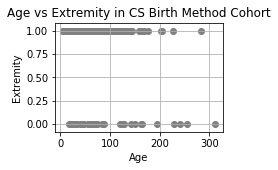

PointbiserialrResult(correlation=-0.13709760125700265, pvalue=0.11840641829957745)
Gestation_(D)


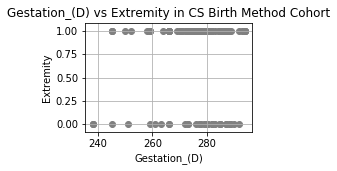

PointbiserialrResult(correlation=0.11161919956127754, pvalue=0.20434607875199448)
Weight


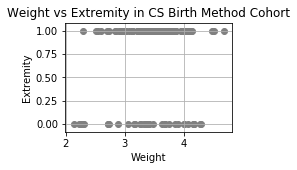

PointbiserialrResult(correlation=0.11688107485250035, pvalue=0.183681260851154)
Extremity


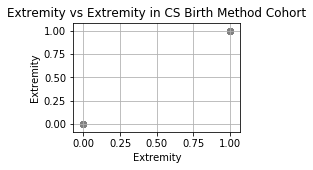

PointbiserialrResult(correlation=1.0, pvalue=0.0)


In [112]:
#Cohorts Analysis - Birth method
## CS
###segment Var
data = data_orig
data = data[data.Birth_Method=='Vaginal']
data = data[['Age','Gestation_(D)','Weight','Extremity' ]]
code_Extremity = {"Extremity":     {"T": 1, "NIL": 0}}
data.replace(code_Extremity, inplace=True)
for var in data.columns:
    print(var)
    Extremity = data['Extremity']
    y = data[var]
    pbc = stats.pointbiserialr(Extremity,y)
    plt.figure(1, figsize = (3,2))
    plt.scatter(y, Extremity,  color='gray')
    plt.title('%s vs Extremity in CS Birth Method Cohort' %(var))
    plt.ylabel('Extremity')
    plt.xlabel(var)
    plt.grid(True)
    plt.show()
    print(pbc) 

In [125]:
freq_table.iloc[0][0]

23

In [128]:
# vaginal
data = data_orig.drop(columns={'Age','Gestation_(D)','Weight'})
data = data[data.Birth_Method=='Vaginal']

significance = 0.05


for var in data.columns:
    print(var)
    freq_table = pd.crosstab(data[var], data.Extremity, rownames = [var], colnames= ['Extremity'])
    print(tabulate(freq_table, headers='keys', tablefmt='psql'))
    #Chi test
    chi, pval_chi, dof_chi, exp_chi = chi2_contingency(freq_table)

    p = 1 - significance
    critical_value_chi = chi2.ppf(p, dof_chi)
    print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value_chi))
    if chi > critical_value_chi:
        print("""At %.2f level of significance, by using chi-test we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
    else:
        print("""At %.2f level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.""" % (significance))
    ##Ficher test
    try:
        if freq_table.iloc[0][0]>freq_table.iloc[1][0]:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='greater')
            print('greater is chosen')
        else:
            oddsratio, pvalue_fisher = stats.fisher_exact(freq_table, alternative='less')
            print('Less is chosen')
        print('p=%.6f one side' % (pvalue_fisher))
        oddsratio, pvalue_fisher = stats.fisher_exact(freq_table)
        print('p=%.6f two sides' % (pvalue_fisher))
        if pvalue_fisher <= significance:
            print("""At %.2f level of significance, by using Fisher's test we reject the null hypotheses and accept H1. 
                They are not independent.""" % (significance))
        else:
            print("""At %.2f level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.""" % (significance))
    except:
        print("Cannot perform this calculation by the regular mode")
    

Gender
+----------+-------+-----+
| Gender   |   NIL |   T |
|----------+-------+-----|
| F        |    13 |  35 |
| M        |    24 |  59 |
+----------+-------+-----+
chi=0.000532, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
Less is chosen
p=0.493979 one side
p=1.000000 two sides
At 0.05 level of significance, by using by using Fisher's test, we accept the null hypotheses. 
                They are independent.
Sibling_Order
+-----------------+-------+-----+
| Sibling_Order   |   NIL |   T |
|-----------------+-------+-----|
| (0.0, 1.0]      |    19 |  39 |
| (1.0, inf]      |    18 |  55 |
+-----------------+-------+-----+
chi=0.685041, critical value=3.841459

At 0.05 level of significance, by using chi-test, we accept the null hypotheses. 
            They are independent.
greater is chosen
p=0.203734 one side
p=0.333585 two sides
At 0.05 level of significance, by using by using Fishe